### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set()

### Read .csv file and preprocess data

In [2]:
raw_data = pd.read_csv('minutes-and-certificates.csv')
raw_data.head()

,student_id,"round(sum(seconds_watched) / 60, 2)",minutes_watched,certificates_issued
0,4640,586.80,0,1
1,5836,1903.12,0,3
2,801,6066.00,0,13
3,2022,115.37,0,1
4,6278,2181.32,0,2


In [3]:
data = raw_data.copy()

In [4]:
data = data.drop(['minutes_watched'], axis = 1)
data

,student_id,"round(sum(seconds_watched) / 60, 2)",certificates_issued
0,4640,586.80,1
1,5836,1903.12,3
2,801,6066.00,13
3,2022,115.37,1
4,6278,2181.32,2
...,...,...,...
653,257112,265.60,2
654,154291,371.37,1
655,276783,698.83,3
656,278326,271.53,1


In [5]:
data.isnull().sum()

student_id                             0
round(sum(seconds_watched) / 60, 2)    7
certificates_issued                    0
dtype: int64

In [6]:
data = data.fillna(0)
data.isnull().sum()

student_id                             0
round(sum(seconds_watched) / 60, 2)    0
certificates_issued                    0
dtype: int64

In [7]:
data = data.rename(columns = {'round(sum(seconds_watched) / 60, 2)': 'minutes_watched'})
data

,student_id,minutes_watched,certificates_issued
0,4640,586.80,1
1,5836,1903.12,3
2,801,6066.00,13
3,2022,115.37,1
4,6278,2181.32,2
...,...,...,...
653,257112,265.60,2
654,154291,371.37,1
655,276783,698.83,3
656,278326,271.53,1


In [8]:
data = data.drop(['student_id'], axis = 1)
data

,minutes_watched,certificates_issued
0,586.80,1
1,1903.12,3
2,6066.00,13
3,115.37,1
4,2181.32,2
...,...,...
653,265.60,2
654,371.37,1
655,698.83,3
656,271.53,1


### Divide data into features and targets

In [9]:
target = data['certificates_issued']
target

0       1
1       3
2      13
3       1
4       2
       ..
653     2
654     1
655     3
656     1
657     2
Name: certificates_issued, Length: 658, dtype: int64

In [10]:
feature = data['minutes_watched']
feature

0       586.80
1      1903.12
2      6066.00
3       115.37
4      2181.32
        ...   
653     265.60
654     371.37
655     698.83
656     271.53
657     396.08
Name: minutes_watched, Length: 658, dtype: float64

### Train-Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, train_size = 0.8, random_state = 365)

In [12]:
print(x_train.shape, y_train.shape)

(526,) (526,)


In [13]:
print(x_test.shape, y_test.shape)

(132,) (132,)


In [14]:
x_train, x_test, y_train, y_test = x_train.to_numpy(), x_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [15]:
x_train, x_test, y_train, y_test = x_train.reshape(-1,1), x_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

### Linear Regression

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(x_train, y_train)

LinearRegression()

In [19]:
reg.coef_

array([[0.00165297]])

In [20]:
reg.intercept_

array([1.21653924])

In [21]:
reg.score(x_train, y_train)

0.2334282568895234

In [23]:
y_hat = reg.predict(x_train)

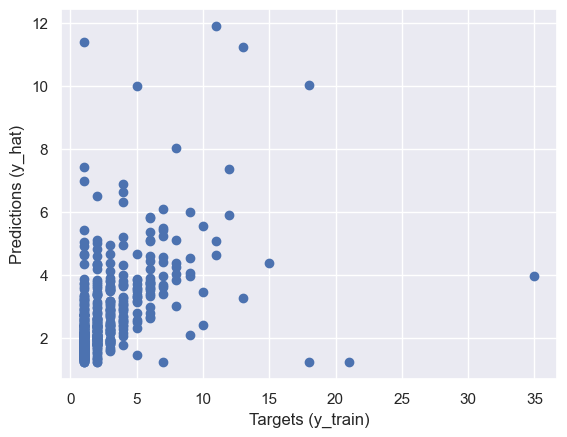

In [25]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.show()